In [28]:
import warnings
import pathlib
from datetime import datetime, timedelta
import multiprocessing

import numpy as np
from numpy import ma
import pandas as pd
import xarray as xr
import tqdm

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colorbar import ColorbarBase
from matplotlib import patches
import cartopy.crs as ccrs

import intake
import healpy

In [2]:
data_path = pathlib.Path(f"/scratch/b/b382728/tobac_tracks")

In [3]:
datasets_2025 = [xr.open_dataset(f) for f in sorted(list((data_path/"2025").glob("*.nc")))]

In [4]:
datasets_2025[0]

<xarray.Dataset> Size: 873MB
Dimensions:                   (feature: 2746692, cell: 339604,
                               cluster: 2382982, track: 154727)
Coordinates:
  * feature                   (feature) int64 22MB 42 237 ... 5524619 5524620
  * cell                      (cell) int64 3MB 42 237 262 ... 1253229 1253234
  * cluster                   (cluster) int64 19MB 1 2 3 ... 2382981 2382982
  * track                     (track) int64 1MB 1 2 3 4 ... 187714 187715 187716
Data variables: (12/32)
    frame                     (feature) int64 22MB ...
    idx                       (feature) int64 22MB ...
    y                         (feature) float64 22MB ...
    x                         (feature) float64 22MB ...
    detection_pixel_count     (feature) int64 22MB ...
    threshold_value           (feature) int64 22MB ...
    ...                        ...
    cluster_longitude         (cluster) float64 19MB ...
    cluster_latitude          (cluster) float64 19MB ...
    cluster_area              (cluster) float64 19MB ...
    cluster_max_precip        (cluster) float64 19MB ...
    cluster_total_precip      (cluster) float64 19MB ...
    is_track_mcs              (track) bool 155kB ...

In [8]:
init_cluster = datasets_2025[0].cluster.groupby(datasets_2025[0].cluster_track_id).min()

In [9]:
datasets_2025[0].cluster_latitude.loc[init_cluster]

<xarray.DataArray 'cluster_latitude' (cluster_track_id: 154727)> Size: 1MB
[154727 values with dtype=float64]
Coordinates:
    cluster           (cluster_track_id) int64 1MB 1 2 3 ... 2381583 2381584
  * cluster_track_id  (cluster_track_id) int64 1MB 1 2 3 ... 187715 187716

In [13]:
def get_initial_lat_lon(ds):
    init_cluster = ds.cluster.groupby(ds.cluster_track_id).min()
    return ds.cluster_latitude.loc[init_cluster].values, ds.cluster_longitude.loc[init_cluster].values

In [14]:
get_initial_lat_lon(datasets_2025[0])

(array([ 54.93333333,  12.27774009,   8.19375   , ..., -32.75909091,
        -42.40584416, -51.57051282]),
 array([342.8666667 , 200.25703803, 231.125     , ..., 215.48636363,
        191.45259781, 323.57564101]))

In [15]:
lat_lons = np.concatenate([get_initial_lat_lon(ds) for ds in datasets_2025], 1)

array([[ 54.93333333,  12.27774009,   8.19375   , ..., -21.13181818,
        -27.40333333, -29.18333333],
       [342.8666667 , 200.25703803, 231.125     , ..., 191.62272725,
        144.37666665, 157.675     ]])

In [17]:
lat_lons.shape

(2, 1868579)

In [18]:
lats_2025 = lat_lons[0]
lons_2025 = lat_lons[1]

In [24]:
dist_2025 = np.histogram2d(
    lats_2025, lons_2025, bins=(np.linspace(-60,60,181), np.linspace(0,360,361))
)

In [25]:
dist_2025

(array([[ 7.,  5.,  3., ...,  6.,  7.,  4.],
        [ 7.,  4.,  5., ...,  4.,  9.,  7.],
        [ 5.,  4.,  6., ...,  8.,  1.,  9.],
        ...,
        [16.,  9., 13., ..., 15., 15., 13.],
        [14., 17., 21., ..., 22., 12., 15.],
        [14., 19., 21., ..., 23., 16., 23.]]),
 array([-60.        , -59.33333333, -58.66666667, -58.        ,
        -57.33333333, -56.66666667, -56.        , -55.33333333,
        -54.66666667, -54.        , -53.33333333, -52.66666667,
        -52.        , -51.33333333, -50.66666667, -50.        ,
        -49.33333333, -48.66666667, -48.        , -47.33333333,
        -46.66666667, -46.        , -45.33333333, -44.66666667,
        -44.        , -43.33333333, -42.66666667, -42.        ,
        -41.33333333, -40.66666667, -40.        , -39.33333333,
        -38.66666667, -38.        , -37.33333333, -36.66666667,
        -36.        , -35.33333333, -34.66666667, -34.        ,
        -33.33333333, -32.66666667, -32.        , -31.33333333,
        -30

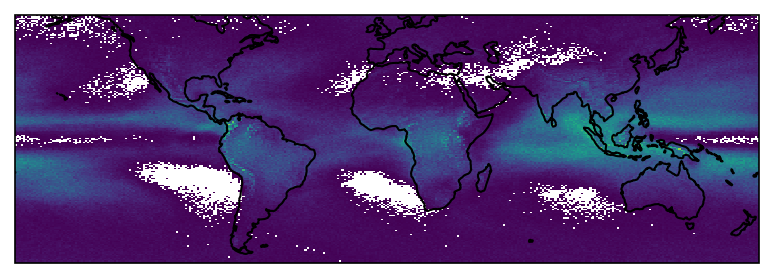

In [35]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), dpi=150)

ax.imshow(
    ma.array(dist_2025[0], mask=dist_2025[0]==0), 
    vmin=0, vmax=320, extent=(0,360,60,-60),
    interpolation="nearest"
)

ax.coastlines()

ax.set_extent([-180,180,-60,60])

In [36]:
datasets_2045 = [xr.open_dataset(f) for f in sorted(list((data_path/"2045").glob("*.nc")))]

In [37]:
lat_lons_2045 = np.concatenate([get_initial_lat_lon(ds) for ds in datasets_2045], 1)

In [39]:
lats_2045 = lat_lons_2045[0]
lons_2045 = lat_lons_2045[1]

In [40]:
dist_2045 = np.histogram2d(
    lats_2045, lons_2045, bins=(np.linspace(-60,60,181), np.linspace(0,360,361))
)

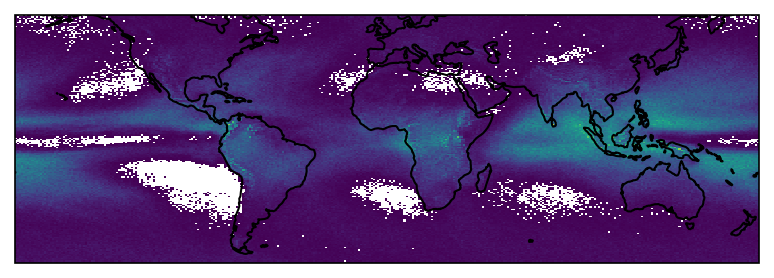

In [41]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), dpi=150)

ax.imshow(
    ma.array(dist_2045[0], mask=dist_2045[0]==0), 
    vmin=0, vmax=320, extent=(0,360,60,-60),
    interpolation="nearest"
)

ax.coastlines()

ax.set_extent([-180,180,-60,60])

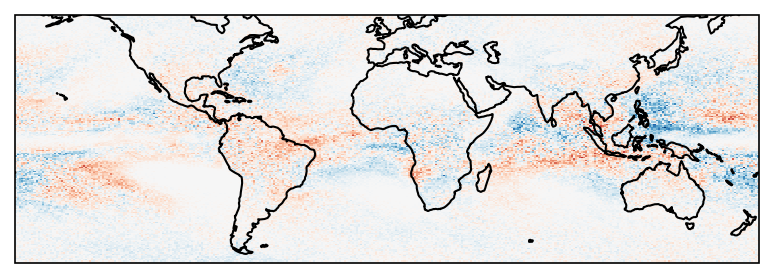

In [42]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), dpi=150)

ax.imshow(
    dist_2045[0] - dist_2025[0], 
    vmin=-80, vmax=80, cmap="RdBu", extent=(0,360,60,-60),
    interpolation="nearest"
)

ax.coastlines()

ax.set_extent([-180,180,-60,60])

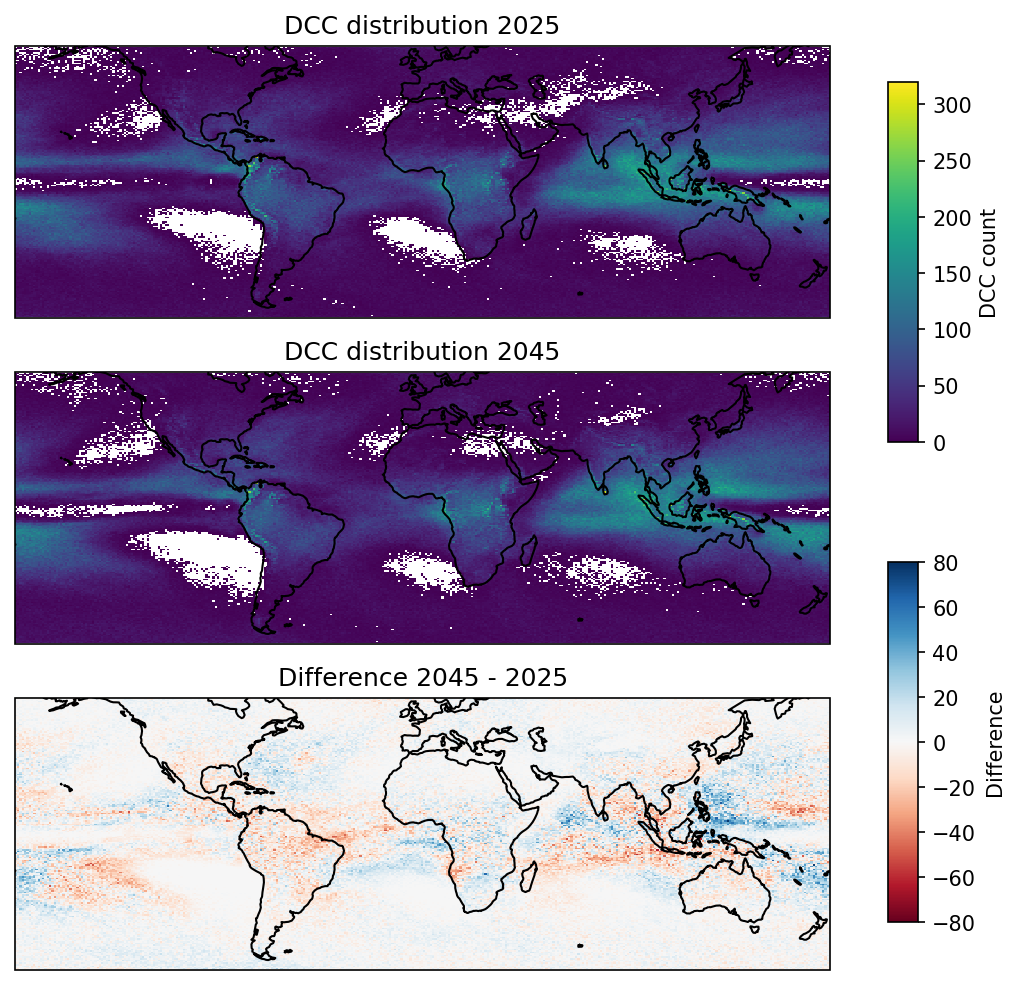

In [49]:
fig, axes = plt.subplots(3, 1, figsize=(8,8), subplot_kw=dict(projection=ccrs.PlateCarree()), dpi=150)

img0 = axes[0].imshow(
    ma.array(dist_2025[0], mask=dist_2025[0]==0), 
    vmin=0, vmax=320, extent=(0,360,60,-60),
    interpolation="nearest"
)
axes[0].coastlines()
axes[0].set_extent([-180,180,-60,60])
axes[0].set_title("DCC distribution 2025")


img1 = axes[1].imshow(
    ma.array(dist_2045[0], mask=dist_2045[0]==0), 
    vmin=0, vmax=320, extent=(0,360,60,-60),
    interpolation="nearest"
)
axes[1].coastlines()
axes[1].set_extent([-180,180,-60,60])
axes[1].set_title("DCC distribution 2045")

img2 = axes[2].imshow(
    dist_2045[0] - dist_2025[0], 
    vmin=-80, vmax=80, cmap="RdBu", extent=(0,360,60,-60),
    interpolation="nearest"
)
axes[2].coastlines()
axes[2].set_extent([-180,180,-60,60])
axes[2].set_title("Difference 2045 - 2025")

cax1 = fig.add_axes([0.9,0.55,0.025,0.3])
cbar1 = plt.colorbar(img0, cax=cax1, label="DCC count")

cax2 = fig.add_axes([0.9,0.15,0.025,0.3])
cbar2 = plt.colorbar(img2, cax=cax2, label="Difference")